## Getting all the necessary imports

In [6]:
import numpy as np
import telco_acquire
import prepare
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Telco Project Report

### Goal:
  - 	To create a classification model that can accurately identify the customers as someone that will churn or not using the TELCO data. To attain this goal, I will be identifying the drivers of the churn and create a model that will incorporate these drivers(variables) to accurately predict the customer’s likelihood to churn. 
  
  
  
 ### Phases:
 - Planning
 - Data Acquistion
 - Data Preparation
 - Data Exploration
 - Modeling
 - Summary
 
**Planning**
- Outline step by step process to complete the project
- A detailed plan can be found in the Readme.md file

**Data Acquisition**
- The code needed to acquire the data from the CodeUp database can be found in the **telco_acquire.py** file.
- Access credentials are required to access the CodeUp database
- Acquire also creates a local copy of the dataframe so that you wont have to access the database each time you run get_telco_data

In [7]:
# acquiring data
telco = telco_acquire.get_telco_data()

**Data Preparation**
- The code needed to prepare the data can be found in the **telco_prepare.py** file
- Get some information about the data

In [8]:
# getting info on the dataframe, you can see the data type, if any null presents, name of the columns, 
telco.info()

## we can see that there are column like total_charges that should have been numeric but are not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [9]:
# lets look at the data

telco.head(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,1,Yes,4,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,1,Yes,1,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,No,1,Yes,1,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,No,1,No,3,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


- run a summary statistics

In [10]:
telco.describe().T

# there is nothing unusual about the data so far except the min value of 0 for tenure, we should check out the 
# total charges for those observations with 0 tenure but first lets change the data type of total charges

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


- change the data type for total_charges column

In [11]:
telco.total_charges = pd.to_numeric(telco.total_charges, errors = 'coerce')
telco.sort_values(by = 'tenure', ascending = True).head(15).T

# the ones with 0 months for tenure now have NaNs for total charges. lets get a count of them next

,6143,6569,6895,2132,6615,2048,6686,1878,6605,1949,2029,5784,3517,5549,5793
customer_id,2923-ARZLG,2520-SGTTA,7644-OMVMY,5709-LVOEQ,3213-VVOLG,4472-LVYGI,4367-NUYAO,1371-DWPAZ,3115-CZMZD,2775-SEFEE,4075-WKNIU,4800-VHZKI,5054-IEXZT,0673-IGUQO,4897-QSUYC
gender,Male,Female,Male,Female,Male,Female,Male,Female,Male,Male,Female,Female,Male,Male,Female
senior_citizen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
partner,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No
dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No
tenure,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
phone_service,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,No,No,No,Yes,No phone service,Yes,No phone service,No,Yes,Yes,No,No,No,No
internet_service_type_id,3,3,3,1,3,1,3,1,3,1,1,3,2,3,3
online_security,No internet service,No internet service,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,No,No internet service,No,No internet service,No internet service


In [12]:
print(telco.isnull().sum())

# we can see that there are 11 missing values for total_charges and these are the same values that have 0 for tenure

# lets get missing value %

print(telco.isnull().sum()/len(telco) * 100)

# its roughly 0.15% of the data, so we will drop these observations

customer_id                  0
gender                       0
senior_citizen               0
partner                      0
dependents                   0
tenure                       0
phone_service                0
multiple_lines               0
internet_service_type_id     0
online_security              0
online_backup                0
device_protection            0
tech_support                 0
streaming_tv                 0
streaming_movies             0
contract_type_id             0
paperless_billing            0
payment_type_id              0
monthly_charges              0
total_charges               11
churn                        0
contract_type                0
internet_service_type        0
payment_type                 0
dtype: int64
customer_id                 0.000000
gender                      0.000000
senior_citizen              0.000000
partner                     0.000000
dependents                  0.000000
tenure                      0.000000
phone_service        

In [13]:
# using boolean mask to get the data where tenure is not equal to 0

telco = telco[telco.tenure != 0]
telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.90,542.40,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,1,Yes,4,69.40,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,1,Yes,1,48.20,340.35,No,Month-to-month,DSL,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,No,1,Yes,1,25.10,25.10,Yes,Month-to-month,DSL,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,No,1,No,3,30.50,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9950-MTGYX,Male,0,Yes,Yes,28,Yes,No,3,No internet service,...,No internet service,3,Yes,4,20.30,487.95,No,Two year,None,Credit card (automatic)
7039,9953-ZMKSM,Male,0,No,No,63,Yes,Yes,3,No internet service,...,No internet service,3,No,2,25.25,1559.30,No,Two year,None,Mailed check
7040,9964-WBQDJ,Female,0,Yes,No,71,Yes,Yes,3,No internet service,...,No internet service,3,Yes,4,24.40,1725.40,No,Two year,None,Credit card (automatic)
7041,9972-EWRJS,Female,0,Yes,Yes,67,Yes,No,3,No internet service,...,No internet service,3,Yes,3,19.25,1372.90,No,Two year,None,Bank transfer (automatic)


- Lets combine some columns such as: partner and dependents, streaming_tv and streaming_movies, phone_service and multiple_lines, online_security and online_backup

In [14]:

# we are combining partner and dependents to make one column named partner_dependents which will hold True if  
# customers have both partners and dependents, else it will hold False
conditions = [(telco['partner']== "Yes") & (telco['dependents'] == 'Yes'),
             (telco['partner']== "No") & (telco['dependents'] == 'No')]


values = [True, False]

telco['partner_dependents'] = np.select(conditions, values)
    

# we are combining phone_service and multiple_lines to make one columns named phone_and_multiple_lines which will 
# hold a True value if a customer have both, else False
    
    
conditions1 = [(telco['phone_service'] == 'Yes') & (telco['multiple_lines'] == 'Yes'),
              (telco['phone_service']  == 'Yes') & (telco['multiple_lines'] == 'No'), 
              (telco['phone_service']  == 'Yes') & (telco['multiple_lines'] == 'No phone service'),
              (telco['phone_service']  == 'No') & (telco['multiple_lines'] == 'No'),
             (telco['phone_service']  == 'No') & (telco['multiple_lines'] == 'Yes'),
              (telco['phone_service']  == 'No') & (telco['multiple_lines'] == 'No phone service')   
             ]

values1 = [True, False, False, False, False,False ]

telco['phone_and_multiple_lines'] = np.select(conditions1, values1)
    


# we are combining streaming_tv and streaming_movies to make one columns named streaming_tv_movies which will 
# hold a True value if a customer streams both, else False   

    
conditions2 = [(telco['streaming_tv']=='Yes') & (telco['streaming_movies'] == 'Yes'),
              (telco['streaming_tv']=='No') & (telco['streaming_movies'] == 'No')]


values2 = [True, False ]


telco['streaming_tv_movie'] = np.select(conditions2, values2)
    
    
    
# we are combining online_security and online_backup to make one columns named online_security_and_backup which will 
# hold a True value for if a customer have both service, else False   
    
    
conditions3 = [(telco['online_security']=='Yes') & (telco['online_backup'] == 'Yes'),
              (telco['online_security']=='No') & (telco['online_backup'] == 'No')]

values3 = [True, False]
    
    
telco['online_security_and_backup'] = np.select(conditions3, values3)
    
    
telco = telco.replace({'payment_type':{'Bank transfer (automatic)':'payment_auto', 'Credit card (automatic)': 'payment_auto',
                                      'Mailed check': 'payment_not_auto', 'Electronic check': 'payment_not_auto'}})
telco = telco.rename(columns = {'payment_type': 'payment_auto'})
    
   

- lets change the Yes to 1 and No to 0 for all the columns that have yes and no as values

In [15]:
# changing all the Yes to 1, and all the No to 0

telco = telco.replace({'churn':{'Yes':1, 'No': 0}})
    
telco = telco.replace({'partner':{'Yes':1, 'No': 0}})
    
telco = telco.replace({'dependents':{'Yes':1, 'No': 0}})
    
telco = telco.replace({'paperless_billing':{'Yes':1, 'No': 0}})
    
telco = telco.replace({'phone_service':{'Yes':1, 'No': 0}})

- changing yes to 1, no to 0, and no internet or phone service to 0

In [16]:
telco = telco.replace({'streaming_tv': {'Yes': 1, 'No internet service': 0, 'No':0}})
    
telco = telco.replace({'streaming_movies': {'Yes': 1, 'No internet service': 0, 'No':0}})
    
telco = telco.replace({'multiple_lines': {'Yes': 1, 'No internet service': 0, 'No':0, 'No phone service': 0}})
    
telco = telco.replace({'online_security': {'Yes': 1, 'No internet service': 0, 'No':0}})
    
telco = telco.replace({'online_backup': {'Yes': 1, 'No internet service': 0, 'No':0}})
    
telco = telco.replace({'device_protection': {'Yes': 1, 'No internet service': 0, 'No':0}})
    
telco = telco.replace({'tech_support': {'Yes': 1, 'No internet service': 0, 'No':0}})

telco = telco.replace({'payment_auto': {'payment_auto': 1, 'payment_not_auto': 0}})

In [17]:
telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_auto,partner_dependents,phone_and_multiple_lines,streaming_tv_movie,online_security_and_backup
0,0003-MKNFE,Male,0,0,0,9,1,1,1,0,...,59.90,542.40,0,Month-to-month,DSL,0,0,1,0,0
1,0013-MHZWF,Female,0,0,1,9,1,0,1,0,...,69.40,571.45,0,Month-to-month,DSL,1,0,0,1,0
2,0015-UOCOJ,Female,1,0,0,7,1,0,1,1,...,48.20,340.35,0,Month-to-month,DSL,0,0,0,0,0
3,0023-HGHWL,Male,1,0,0,1,0,0,1,0,...,25.10,25.10,1,Month-to-month,DSL,0,0,0,0,0
4,0032-PGELS,Female,0,1,1,1,0,0,1,1,...,30.50,30.50,1,Month-to-month,DSL,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9950-MTGYX,Male,0,1,1,28,1,0,3,0,...,20.30,487.95,0,Two year,None,1,1,0,0,0
7039,9953-ZMKSM,Male,0,0,0,63,1,1,3,0,...,25.25,1559.30,0,Two year,None,0,0,1,0,0
7040,9964-WBQDJ,Female,0,1,0,71,1,1,3,0,...,24.40,1725.40,0,Two year,None,1,0,1,0,0
7041,9972-EWRJS,Female,0,1,1,67,1,0,3,0,...,19.25,1372.90,0,Two year,None,1,1,0,0,0


In [18]:
telco.dtypes

customer_id                    object
gender                         object
senior_citizen                  int64
partner                         int64
dependents                      int64
tenure                          int64
phone_service                   int64
multiple_lines                  int64
internet_service_type_id        int64
online_security                 int64
online_backup                   int64
device_protection               int64
tech_support                    int64
streaming_tv                    int64
streaming_movies                int64
contract_type_id                int64
paperless_billing               int64
payment_type_id                 int64
monthly_charges               float64
total_charges                 float64
churn                           int64
contract_type                  object
internet_service_type          object
payment_auto                    int64
partner_dependents              int64
phone_and_multiple_lines        int64
streaming_tv

- lets conver the contract type and internet service type using dummy variables


In [19]:
# almost done with converting the columns to numeric type


dummies_contract_type = pd.get_dummies(telco.contract_type)
    
dummies_internet_type = pd.get_dummies(telco.internet_service_type)
    
telco = pd.concat([telco, dummies_contract_type, dummies_internet_type], axis = 1)

In [20]:
telco.dtypes

customer_id                    object
gender                         object
senior_citizen                  int64
partner                         int64
dependents                      int64
tenure                          int64
phone_service                   int64
multiple_lines                  int64
internet_service_type_id        int64
online_security                 int64
online_backup                   int64
device_protection               int64
tech_support                    int64
streaming_tv                    int64
streaming_movies                int64
contract_type_id                int64
paperless_billing               int64
payment_type_id                 int64
monthly_charges               float64
total_charges                 float64
churn                           int64
contract_type                  object
internet_service_type          object
payment_auto                    int64
partner_dependents              int64
phone_and_multiple_lines        int64
streaming_tv

- Drop unused/redundant/duplicated columns

In [21]:
cols_to_drop = ['internet_service_type', 'None', 'contract_type', 'payment_type_id', 
                    'internet_service_type_id','contract_type_id','gender']
    
    
telco = telco.drop(columns = cols_to_drop)

- split the data

In [22]:
# in our prepare.py file, we have defined a function that splits data into train, test, and validate with 
# with stratification of churn column

train, test, validate = prepare.split_data(telco)

- that concludes data preparation phase.


**Data Exploration**
- Explore various variables to discover relationships, correlation
- Formulate hypothesis and perform hypothesis test


In [23]:
# lets check how many of our customers churn?
print(f'Number of customers that churn is: {train.churn.value_counts()[1]}')
print('')

print(f'Percentage of the customers that churn is: {train.churn.value_counts()[1]/len(train)*100}')

## Approximately 27 % of our customers churn

Number of customers that churn is: 1196

Percentage of the customers that churn is: 26.57777777777778


Number of customers who churn within the first year: 681


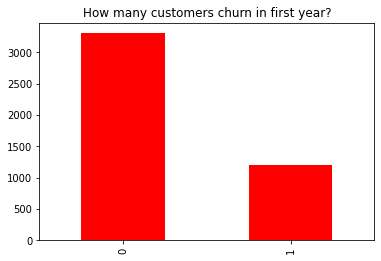

In [24]:
# lets check when they churn

print(f'Number of customers who churn within the first year: {train[train.churn == 1].tenure.value_counts().head(12).sum()}')

# out of 1196 customers 681 left within the first year

train.churn.value_counts().plot(kind = 'bar', color = 'red')
plt.title('How many customers churn in first year?')
plt.show()

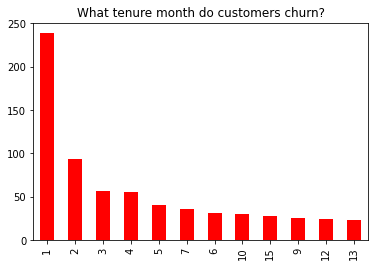

In [25]:
# lets check what tenure month they churn

train[train.churn == 1].tenure.value_counts().head(12).plot(kind = 'bar', color = 'red')
plt.title('What tenure month do customers churn?')
plt.show()

1    1060
0     136
Name: Month-to-month, dtype: int64


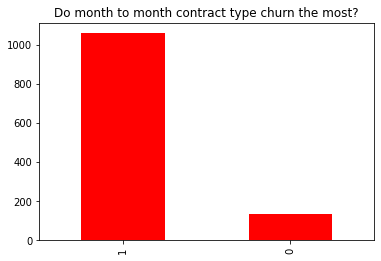

In [26]:
# lets check what contract type churn the most?
print(train[train.churn == 1]['Month-to-month'].value_counts())


train[train.churn == 1]['Month-to-month'].value_counts().plot(kind = 'bar', color = 'red')
plt.title('Do month to month contract type churn the most?')
plt.show()

## we can see that majority of the customers that churn are month to month

In [27]:
# How about the customers who stay? Are majority of them month to month? or other contract type?
print(train[train.churn == 0]['Month-to-month'].value_counts())
print('')

print(train[train.churn == 0]['One year'].value_counts())
print('')

print(train[train.churn == 0]['Two year'].value_counts())


# Majority of the customers who stay are not the month to month customers

0    1895
1    1409
Name: Month-to-month, dtype: int64

0    2480
1     824
Name: One year, dtype: int64

0    2233
1    1071
Name: Two year, dtype: int64


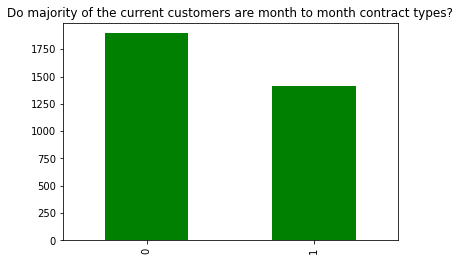

In [28]:
train[train.churn == 0]['Month-to-month'].value_counts().plot(kind = 'bar', color = 'green')
plt.title('Do majority of the current customers are month to month contract types?')
plt.show()



## Majority of the customers that tend to stay are the ones with contract type other than month to month

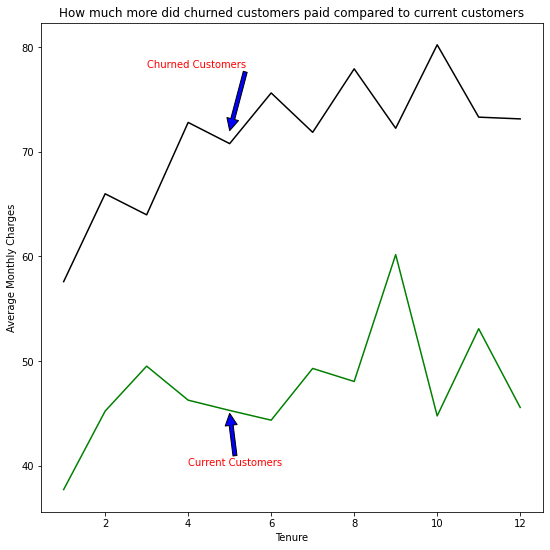

In [29]:
# are there other things that might have influenced churn? How about monthly charge? lets take a look

plt.figure(figsize= (9,9))

train[train.churn == 1].groupby('tenure').monthly_charges.mean().head(12).plot(color = 'black')

train[train.churn == 0].groupby('tenure').monthly_charges.mean().head(12).plot(color = 'green')

plt.xlabel('Tenure')

plt.ylabel('Average Monthly Charges')

plt.title("How much more did churned customers paid compared to current customers")

plt.annotate('Churned Customers', xy = (5, 72), xytext=(3, 78),arrowprops={'facecolor': 'blue'}, color = 'red')

plt.annotate('Current Customers', xy = (5, 45), xytext=(4, 40),arrowprops={'facecolor': 'blue'}, color = 'red')

plt.show()


## the customers that churn, on average, pay significantly higher than those that dont churn

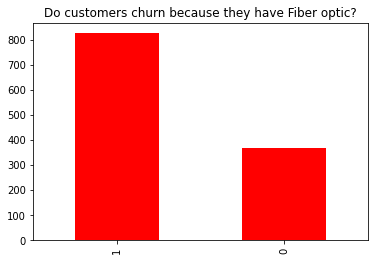

In [30]:
# so why are they paying more? is it because they have multiple lines? enrolled in various other services? 
# lets take a look




train[train.churn == 1]['Fiber optic'].value_counts().plot(kind = 'bar', color = 'red')

plt.title('Do customers churn because they have Fiber optic?')

## we can see that majority of the customers who churn have fiber optic

plt.show()


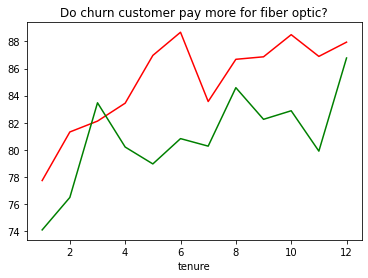

In [31]:
# lets check how the monthly average compares between churned customers with fiber optic and current customers
# with fiber optic
churn = train[train.churn == 1]

not_churn = train[train.churn ==0]

churn[churn['Fiber optic']==1].groupby('tenure').monthly_charges.mean().head(12).plot(color = 'red')

not_churn[not_churn['Fiber optic']==1].groupby('tenure').monthly_charges.mean().head(12).plot(color = 'green')

plt.title('Do churn customer pay more for fiber optic?')

plt.show()



## Customers who churned and had fiber optic paid relatively higher monthly charge than current customers
## with fiber optic

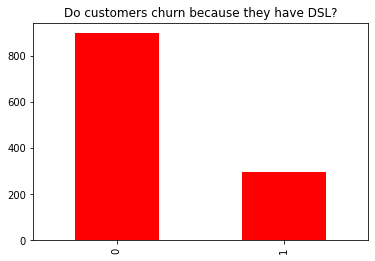

In [35]:
# lets check if customers who churn have other services?

train[train.churn == 1]['DSL'].value_counts().plot(kind = 'bar', color = 'red')

plt.title('Do customers churn because they have DSL?')

plt.show()

# not a big influencer

Text(0.5, 1.0, 'Do customers who stream tv and movie churn more?')

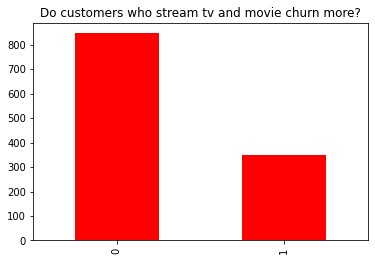

In [33]:
## is streaming tv and movie influencing churn?

train[train.churn == 1]['streaming_tv_movie'].value_counts().plot(kind = 'bar', color = 'red')
plt.title("Do customers who stream tv and movie churn more?")

# somewhat influencing

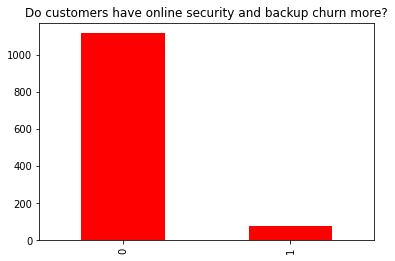

In [36]:
# is having online security and back up influencing churn?

train[train.churn == 1]['online_security_and_backup'].value_counts().plot(kind = 'bar', color = 'red')


plt.title("Do customers have online security and backup churn more?")

plt.show()


# not a influencer

Text(0.5, 1.0, 'Do customers who have phone with multiple lines churn more?')

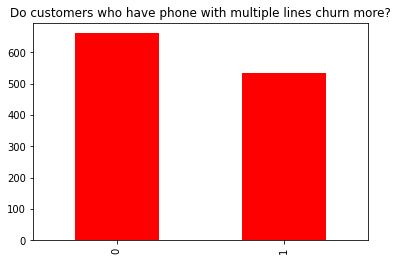

In [40]:
# is having multiple lines influencing churn?


train[train.churn == 1]['phone_and_multiple_lines'].value_counts().plot(kind = 'bar', color = 'red')


plt.title('Do customers who have phone with multiple lines churn more?')

# it seems that customers with phone and multiple lines churn less compared to those without multiple lines

### Based on the above exploration, following hypothesis are made

### Hypothesis1:
#### Month to Month customers churn more


### Hypothesis 2:
#### Churned customers paid more on monthly charge

### Lets test Hypothesis 1

$H_0$: The contract type has no influence on churn rate

$H_a$: Month to month customers churn more


In [37]:
# import necessary modules
from scipy import stats

In [38]:
# Since we are comparing two categorical variables,  so we will need to perform Chi^2 test

a = 0.05 # Setting our significance level
observed_data = pd.crosstab(train.churn, train['Month-to-month'])

In [43]:
# Running chi^2 test

chi2, p, degf, expected = stats.chi2_contingency(observed_data)


# lets check our values

chi2, p, degf, expected

(747.9632623890424,
 1.1124037874492999e-164,
 1,
 array([[1491.20533333, 1812.79466667],
        [ 539.79466667,  656.20533333]]))

In [44]:
# Do we reject or fail to reject the null hypothesis?

if p<a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### lets check hypothesis 2

$H_0$: $\mu$ Monthly charge for churn customers = $\mu$ Monthly charge for current customers

$H_a$: $\mu$ Monthly charge for churn customers > $\mu$ Monthly charge for current customers

In [64]:
# since we are comparing categorical variables with respect to continuous variables, we will perform T test

a = 0.05 # setting our significance level

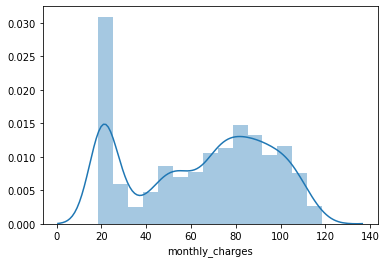

In [41]:
# lets look at the distributio of the monthly charges
sns.distplot(train.monthly_charges)
plt.show()

In [45]:
# creating our subgroups

x1 = train[train.churn == 1].monthly_charges
x2 = train[train.churn == 0].monthly_charges

In [46]:
# checking variance

x1.var(), x2.var()

(611.0760250976051, 975.1498219820324)

#### Assumptions for T test:
    - Monthly charge is normally distributed
    - We have large enough sample
    - Variance is not equal but we can pass an arguments equal_var = False
    

In [48]:
# we will be running a two sampled, one tailed independent T test

t, p1 = stats.ttest_ind(x1, x2, equal_var = False)
t,p1

(14.552441022766798, 3.2374322293830077e-46)

In [50]:
# Do we reject or fail to reject the null hypothesis?

# p/2 because its a one tailed t-test, p value accounts for two tailed test

# positive t value means, the churned customers monthly charge mean is higher

if p1/2<a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### Modeling
 - Create a baseline model using the available data
 - Using various algorithms, create classification models
#### We will create a baseline model first

In [62]:
# Lets get the value count of the churn column in train data set

train.churn.value_counts()



0    3304
1    1196
Name: churn, dtype: int64

In [63]:
# Lets do some math to create a baseline model
# Category with highest count is considered to be a positive prediction
# So our baseline model will predict those that wont churn


baseline_accuracy = train.churn.value_counts()[0]/len(train)
baseline_accuracy 


print(f'The accuracy of our baseline model to predict customers that wont churn is: {baseline_accuracy}')

The accuracy of our baseline model to predict customers that wont churn is: 0.7342222222222222


#### Now we will create 2 models per algorithm


### Logistic Regression

#### Model 1

In [53]:
# separate your predictors and your dependent variables

x_train1 = train.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup' ])
y_train = train.churn


In [55]:
# Create a logistic regression model

logit1 = LogisticRegression(random_state = 111)

In [56]:
# Fit your model

logit1.fit(x_train1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=111, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# Check coefficients
logit1.coef_

array([[ 4.15332825e-01,  4.93829854e-02, -2.19695889e-01,
        -5.74853772e-02, -1.03832394e+00,  3.51375055e-02,
        -4.70366901e-01, -1.38165461e-01, -9.64435897e-02,
        -5.34897214e-01,  1.84109013e-01,  2.15144198e-01,
         4.36174343e-01,  1.67990429e-02,  2.46497195e-04,
        -3.86925078e-01,  3.51375055e-02,  3.65099444e-01,
        -3.62329038e-01, -6.16436841e-01,  5.01033543e-02,
         4.33490682e-01]])

In [58]:
# Calculate accuracy percentage

logit1.score(x_train1, y_train)

0.8093333333333333

In [61]:
# Predict y using the logit model

y_pred1 = logit1.predict(x_train1)

In [60]:
# Lets check the classification report

print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3304
           1       0.67      0.55      0.61      1196

    accuracy                           0.81      4500
   macro avg       0.76      0.73      0.74      4500
weighted avg       0.80      0.81      0.80      4500



### Model 1 accuracy = 81%

### Model 2

In [64]:
# separate your predictors and your dependent variables

x_train2 = train.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup' ])
y_train = train.churn

In [69]:
# Create a logistic regression model with C = 0.10

logit2 = LogisticRegression(random_state = 112, C = 0.10)

In [70]:
# Fit your model

logit2.fit(x_train2, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=112, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
# Check coefficients
logit2.coef_

array([[ 3.87595678e-01,  4.02317646e-02, -2.09927590e-01,
        -5.85319980e-02, -9.59077627e-01,  4.06047556e-02,
        -4.39240331e-01, -1.30067393e-01, -9.16832910e-02,
        -4.99402503e-01,  1.69782666e-01,  1.99189020e-01,
         4.01154300e-01,  1.66971839e-02,  2.48104173e-04,
        -3.62706727e-01,  4.06047556e-02,  3.30265891e-01,
        -3.38168482e-01, -5.66387645e-01,  2.76575834e-02,
         4.10368951e-01]])

In [72]:
# Calculate accuracy percentage

logit2.score(x_train2, y_train)

0.8091111111111111

In [73]:
# Predict y using the logit model

y_pred2 = logit2.predict(x_train2)

In [74]:
# Lets check the classification report

print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3304
           1       0.67      0.55      0.60      1196

    accuracy                           0.81      4500
   macro avg       0.76      0.73      0.74      4500
weighted avg       0.80      0.81      0.80      4500



### Model 2 accuracy = 81%

### Decision Tree


#### Model 3


In [75]:
# separate your predictors and your dependent variables

x_train3 = train.drop(columns = ['customer_id', 'churn',  'partner_dependents',  'streaming_tv_movie',
      'online_security_and_backup' ])
y_train = train.churn

In [76]:
# keeping max_depth as 10 and creating our model

clf3 = DecisionTreeClassifier(max_depth = 10, random_state = 123)

In [77]:
# fitting our model

clf3.fit(x_train3, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [80]:
# Calculating accuracy

clf3.score(x_train3, y_train)

0.8771111111111111

In [81]:
# predicting y 

y_pred3 = clf3.predict(x_train3)

In [82]:
# Classification Report 

print(classification_report(y_train, y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3304
           1       0.79      0.73      0.76      1196

    accuracy                           0.88      4500
   macro avg       0.85      0.83      0.84      4500
weighted avg       0.87      0.88      0.88      4500



### Model 3 accuracy = 88%

#### Model 4


In [83]:
# separate your predictors and your dependent variables

x_train4 = train.drop(columns = ['customer_id', 'churn',  'partner_dependents',  'streaming_tv_movie',
      'online_security_and_backup' ])
y_train = train.churn

In [84]:
# keeping max_depth as 7and creating our model

clf4 = DecisionTreeClassifier(max_depth = 7, random_state = 129)

In [85]:
# fitting our model

clf4.fit(x_train4, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=129, splitter='best')

In [86]:
# Calculating accuracy

clf4.score(x_train4, y_train)

0.8255555555555556

In [87]:
# predicting y 

y_pred4 = clf4.predict(x_train4)

In [88]:
# Classification Report 

print(classification_report(y_train, y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3304
           1       0.71      0.59      0.64      1196

    accuracy                           0.83      4500
   macro avg       0.78      0.75      0.76      4500
weighted avg       0.82      0.83      0.82      4500



### Model 4 accuracy = 83%

## Random Forest

#### Model 5

In [89]:
# separate your predictors and your dependent variables

x_train5 = train.drop(columns = ['customer_id', 'churn', 'partner_dependents',  'streaming_tv_movie',
       'online_security_and_backup'])
y_train = train.churn

In [90]:
# creating a model with max_depth of 5, and min samples leaf of 5


rf1 = RandomForestClassifier(random_state = 139, max_depth = 5, min_samples_leaf = 5)

In [92]:
# fitting our model

rf1.fit(x_train5, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=139,
                       verbose=0, warm_start=False)

In [93]:
# Calculate accuracy

rf1.score(x_train5, y_train)

0.8064444444444444

In [94]:
# Predicting y

y_pred5 = rf1.predict(x_train5)

In [95]:
# Classification Report

print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3304
           1       0.72      0.44      0.55      1196

    accuracy                           0.81      4500
   macro avg       0.77      0.69      0.71      4500
weighted avg       0.80      0.81      0.79      4500



### Model 5 accuracy = 81%

#### Model 6

In [99]:
# separate your predictors and your dependent variables

x_train6 = train.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup', ])
y_train = train.churn

In [100]:
# creating a model with max_depth of 7, and min samples leaf of 10

rf2 = RandomForestClassifier(random_state = 139, max_depth = 7, min_samples_leaf = 10)

In [101]:
# fitting our model

rf2.fit(x_train6, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=139,
                       verbose=0, warm_start=False)

In [102]:
# Calculate accuracy

rf2.score(x_train6, y_train)

0.8184444444444444

In [103]:
# Predicting y

y_pred6 = rf2.predict(x_train6)

In [105]:
# Classification Report

print(classification_report(y_train, y_pred6))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3304
           1       0.71      0.53      0.61      1196

    accuracy                           0.82      4500
   macro avg       0.78      0.73      0.75      4500
weighted avg       0.81      0.82      0.81      4500



### Model 6 accuracy = 82%

## KNN

#### Model 7

In [106]:
# separate your predictors and your dependent variables

x_train7 = train.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup', ])
y_train = train.churn

In [107]:
# creating a KNN model


knn1 = KNeighborsClassifier(n_neighbors = 10)

In [108]:
# fitting our model

knn1.fit(x_train7, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [109]:
# Calculating accuracy


knn1.score(x_train7, y_train)

0.8115555555555556

In [110]:
# predicting y

y_pred7 = knn1.predict(x_train7)

In [111]:
# Classification Report

print(classification_report(y_train, y_pred7))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3304
           1       0.76      0.43      0.55      1196

    accuracy                           0.81      4500
   macro avg       0.79      0.69      0.71      4500
weighted avg       0.80      0.81      0.79      4500



### Model 7 accuracy = 81%

#### Model 8

In [112]:
# separate your predictors and your dependent variables

x_train8 = train.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup' ])
y_train = train.churn

In [113]:
# creating a KNN model

knn2 = KNeighborsClassifier(n_neighbors = 5)



In [114]:
# fitting our model

knn2.fit(x_train8, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [115]:
# Calculating accuracy


knn2.score(x_train8, y_train)

0.8368888888888889

In [116]:
# predicting y

y_pred8 = knn2.predict(x_train8)

In [117]:
# Classification Report

print(classification_report(y_train, y_pred8))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3304
           1       0.76      0.56      0.65      1196

    accuracy                           0.84      4500
   macro avg       0.81      0.75      0.77      4500
weighted avg       0.83      0.84      0.83      4500



### Model 8 accuracy = 84%

## We will chose one best perfomring model from each classification algorith to test on validate dataset

### Validate with logistic model; Model 1

In [118]:
# separating our predictors and dependent variables

# We have to be sure that the predictors data frame have same variables as the data the model trained on

x_val1 = validate.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup' ])
y_val = validate.churn

In [119]:
# Calculating accuracy

logit1.score(x_val1, y_val)

0.7786666666666666

In [120]:
# predicting y validate

y_val_pred1 = logit1.predict(x_val1)

In [121]:
# Classification Report 
print(classification_report(y_val, y_val_pred1))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       826
           1       0.60      0.49      0.54       299

    accuracy                           0.78      1125
   macro avg       0.71      0.69      0.70      1125
weighted avg       0.77      0.78      0.77      1125



### Model 1 accuracy with validate = 78%

### Validate with Decision Tree Model 4

In [122]:
# separating our predictors and dependent variables

# We have to be sure that the predictors data frame have same variables as the data the model trained on

x_val2 = validate.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup' ])
y_val = validate.churn


In [123]:
# Calculating accuracy
clf4.score(x_val2, y_val)


0.7706666666666667

In [124]:
# predicting y validate

y_val_pred2 = clf4.predict(x_val2)

In [125]:
# Classification Report 

print(classification_report(y_val, y_val_pred2))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       826
           1       0.58      0.48      0.53       299

    accuracy                           0.77      1125
   macro avg       0.70      0.68      0.69      1125
weighted avg       0.76      0.77      0.76      1125



### Model 4 accuracy with validate = 77%

### Validate with Random Forest Model 6

In [126]:
# separating our predictors and dependent variables

# We have to be sure that the predictors data frame have same variables as the data the model trained on

x_val3 = validate.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup' ])
y_val = validate.churn


In [127]:
# Calculating accuracy

rf2.score(x_val3, y_val)

0.7831111111111111

In [128]:
# predicting y validate

y_val_pred3 = rf2.predict(x_val3)

In [129]:
# Classification report

print(classification_report(y_val, y_val_pred3))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       826
           1       0.63      0.43      0.52       299

    accuracy                           0.78      1125
   macro avg       0.73      0.67      0.69      1125
weighted avg       0.77      0.78      0.77      1125



### Model 6 accuracy with validate = 78%

### Validate with KNN Model 8

In [130]:
# separating our predictors and dependent variables

# We have to be sure that the predictors data frame have same variables as the data the model trained on

x_val4 = validate.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup', ])
y_val = validate.churn

In [131]:
# Calculating accuracy
knn2.score(x_val4, y_val)

0.7386666666666667

In [132]:
# predicting y validate

y_val_pred4 = knn2.predict(x_val4)

In [133]:
# classification report

print(classification_report(y_val, y_val_pred4))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       826
           1       0.51      0.39      0.44       299

    accuracy                           0.74      1125
   macro avg       0.65      0.63      0.64      1125
weighted avg       0.72      0.74      0.73      1125



### Model 8 accuracy with validate = 74%

### Out of all the models, we will choose the logit model because it had the highest accuracy with validate data
#### Test with logit model: Model 1

In [136]:
# separating our predictors and dependent variables

# We have to be sure that the predictors data frame have same variables as the data the model trained on

x_test = test.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup' ])
y_test = test.churn

In [137]:
# Calculating accuracy

logit1.score(x_test, y_test)

0.8031272210376688

In [138]:
# predicting y test


y_test_pred = logit1.predict(x_test)

In [140]:
# Classification Report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



#### Logistic Regression Model: Model 1 performed with an accuracy of 80 % with the test data

 #### This will be our final model

## Creating a csv to turn in

In [141]:
#concat the train, test, split dataset

#sort the dataframe by index



final_csv = pd.concat([train, test, validate ])


final_csv = final_csv.sort_index()


In [142]:
# creating x and y to predict the customers churn using the same variables we used to build the model




x_final = final_csv.drop(columns = ['customer_id', 'churn', 'partner_dependents',  'streaming_tv_movie',
       'online_security_and_backup'])
y_final = final_csv.churn

In [143]:
# creating a new columns with the predicted value for churn, 1 = Churn, 0 = not churn

final_csv['predicted_churn'] = logit1.predict(x_final)

In [144]:
# getting the count of predictions

final_csv.predicted_churn.value_counts()

0    5477
1    1555
Name: predicted_churn, dtype: int64

In [145]:
# getting the probability of customers liklihood of churning or not


y_final_proba = logit1.predict_proba(x_final)
final_csv['probability'] = y_final_proba[:, 1]

In [146]:
# creating a dataframe with only the required columns

csv_to_turn = final_csv[['customer_id', 'probability', 'predicted_churn', 'churn']]
csv_to_turn = csv_to_turn[['customer_id', 'probability', 'churn', 'predicted_churn']]
csv_to_turn = csv_to_turn.rename(columns = {'churn': 'actual_churn'})

In [147]:
# exporting the dataframe as csv to local repo

csv_to_turn.to_csv('final_file.csv')

## Summary
  - Telco had a churn rate of approximately 27%
  - Key drivers of the churn are the high monthly charge, month-to-month contract, and fiber optic internet
  - The model can predict if a customer will churn or not with 80% accuracy. 
  - We can deploy this model and identify a target group of customers with high probability to churn and provide targeted discouts and deals to keep them with the company. Because, its much cheaper to retain an existing customer than to get a new one

  